In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("docs/search-data.xlsx", sheet_name="main")

In [3]:
df.head(2)

,No,Title,Source,URL,S_Title,S_Abstract,S_Content,Dataset,Method,Metrics,Year,Citation
0,1,"Text-based emotion detection: Advances, challe...",Google Scholar,https://onlinelibrary.wiley.com/doi/full/10.10...,v,v,x,x,x,x,2020.0,"Acheampong FA, Wenyu C, Nunoo‐Mensah H. Text‐b..."
1,2,Semantic-Emotion Neural Network for Emotion Re...,Google Scholar,https://ieeexplore.ieee.org/abstract/document/...,v,v,v,Public,"SENN, BiLSTM, CNN","Recall, Precision, F1",2019.0,"Batbaatar E, Li M, Ryu KH. Semantic-emotion ne..."


In [4]:
df.shape

(250, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          250 non-null    int64  
 1   Title       250 non-null    object 
 2   Source      250 non-null    object 
 3   URL         250 non-null    object 
 4   S_Title     250 non-null    object 
 5   S_Abstract  192 non-null    object 
 6   S_Content   192 non-null    object 
 7   Dataset     192 non-null    object 
 8   Method      192 non-null    object 
 9   Metrics     192 non-null    object 
 10  Year        192 non-null    float64
 11  Citation    192 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 23.6+ KB


In [6]:
df.isnull().any(axis=1).sum()

58

In [7]:
df['Title'].duplicated().sum()

2

In [8]:
df.drop(columns=['No', 'URL', 'Citation'], inplace=True, axis=1)
df.dropna(how='any', axis=0, inplace=True)
df.drop_duplicates(subset=['Title'], keep='last', inplace=True)

In [9]:
df.head(2)

,Title,Source,S_Title,S_Abstract,S_Content,Dataset,Method,Metrics,Year
0,"Text-based emotion detection: Advances, challe...",Google Scholar,v,v,x,x,x,x,2020.0
1,Semantic-Emotion Neural Network for Emotion Re...,Google Scholar,v,v,v,Public,"SENN, BiLSTM, CNN","Recall, Precision, F1",2019.0


In [10]:
df.shape

(191, 9)

In [11]:
df['Year'] = df['Year'].astype(np.int64)

In [12]:
mask = df['S_Title'] == 'v'
df[mask].shape[0]

131

In [13]:
mask = df['S_Abstract'] == 'v'
df[mask].shape[0]

114

In [14]:
mask = df['S_Content'] == 'v'
clean = df[mask]
clean.shape[0]

50

In [15]:
clean.head(2)

,Title,Source,S_Title,S_Abstract,S_Content,Dataset,Method,Metrics,Year
1,Semantic-Emotion Neural Network for Emotion Re...,Google Scholar,v,v,v,Public,"SENN, BiLSTM, CNN","Recall, Precision, F1",2019
4,Emotion and sentiment analysis from Twitter text,Google Scholar,v,v,v,Public,"Naive Bayes, SVM, Random Forest",Accuracy,2019


In [16]:
clean['Source'].value_counts()

Source
IEEE Explorer          14
Science Direct         13
Springer               10
Google Scholar          8
ACM Digital Library     5
Name: count, dtype: int64

<Axes: >

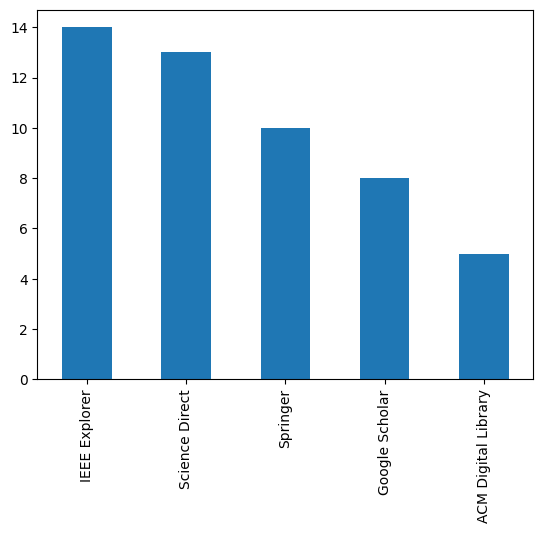

In [17]:
clean['Source'].value_counts().plot(kind='bar', xlabel="")

In [18]:
clean['Year'].value_counts().sort_index()

Year
2013     2
2014     2
2016     2
2017     3
2018     4
2019     8
2020    10
2021    13
2022     6
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='Numbers of Articles'>

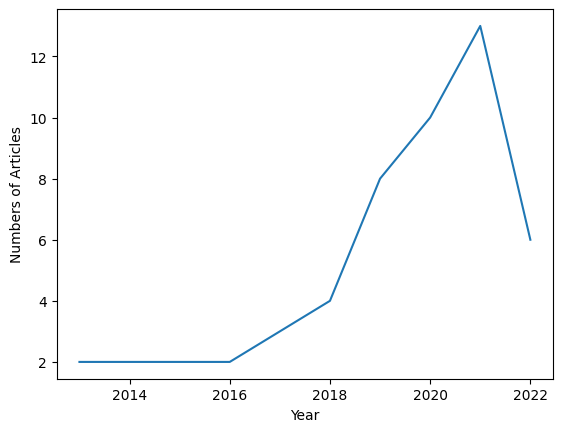

In [19]:
clean['Year'].value_counts().sort_index().plot(kind='line', ylabel="Numbers of Articles")

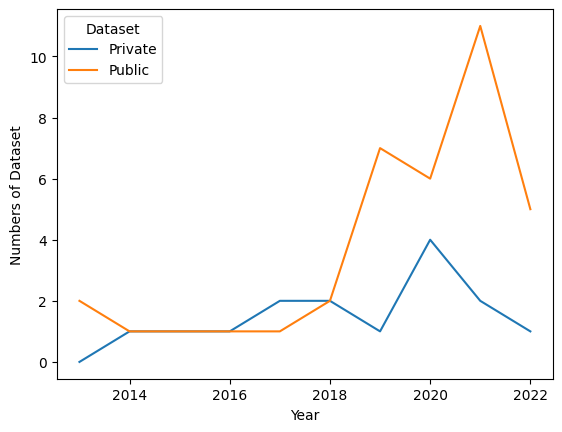

In [20]:
counts = clean.groupby(['Dataset', 'Year']).size().unstack('Dataset', fill_value=0)
counts.plot(kind='line', ylabel="Numbers of Dataset")
plt.savefig('out/dataset-trend-line.png', dpi=300, bbox_inches='tight')

In [21]:
counts['Private'].sum()

14

In [22]:
counts['Public'].sum()

36

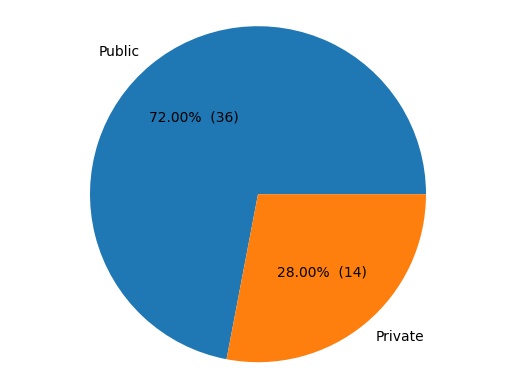

In [23]:
labels = clean['Dataset'].unique()
x = clean['Dataset'].value_counts()

fig, ax = plt.subplots()
ax.pie(x, autopct=lambda val : '{:.2f}%  ({:,.0f})'.format(val,val * sum(x)/100), labels=labels)
ax.axis("equal")
plt.show
plt.savefig('out/dataset-distribution-pie.png', dpi=300, bbox_inches='tight')

In [24]:
methods_list = clean['Method'].str.split(', ')

methods = [method for sublist in methods_list for method in sublist]

methods = pd.Series(methods)
methods.value_counts()

SVM                                24
Naive Bayes                        15
BiLSTM                             11
CNN                                11
Random Forest                      11
Decision Tree                       8
LSTM                                7
KNN                                 6
Logistic Regression                 6
BERT                                5
RNN                                 3
GRU                                 2
ANN                                 2
Multilayer Perceptron               2
Pointwise Mutual Information        1
FLM                                 1
GLM                                 1
MHA-BCNN                            1
SENN                                1
Multiclass Logistic Regression      1
MLP                                 1
IDS-ICM                             1
HAN-ReGRU                           1
Multi Kernel Gaussian Process       1
LRA-DNN                             1
SERR                                1
Semi-supervi

In [25]:
methods.value_counts()[:10]

SVM                    24
Naive Bayes            15
BiLSTM                 11
CNN                    11
Random Forest          11
Decision Tree           8
LSTM                    7
KNN                     6
Logistic Regression     6
BERT                    5
Name: count, dtype: int64

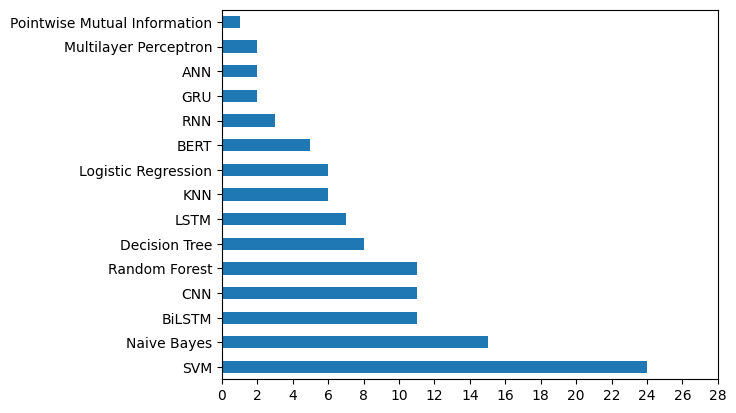

In [26]:
methods.value_counts()[:15].plot(kind='barh', xticks=range(0,30,2))
plt.savefig('out/methods-distribution-barh.png', dpi=300, bbox_inches='tight')

In [27]:
top = methods.value_counts()[:5]
other = methods.value_counts()[5:]
top['others'] = other.sum()
top

SVM              24
Naive Bayes      15
BiLSTM           11
CNN              11
Random Forest    11
others           65
Name: count, dtype: int64

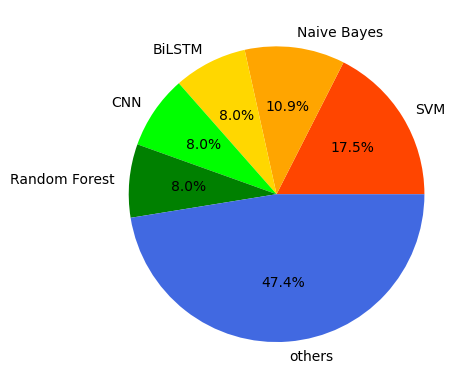

In [28]:
colors = ['orangered', 'orange', 'gold', 'lime', 'green', 'royalblue']
top.plot(kind='pie', colors=colors, autopct='%1.1f%%', ylabel="")
plt.savefig('out/methods-distribution-pie.png', dpi=300, bbox_inches='tight')

In [29]:
metrics_list = clean['Metrics'].str.split(", ")

metrics = [metric for sublist in metrics_list for metric in sublist]
metrics

['Recall',
 'Precision',
 'F1',
 'Accuracy',
 'F1',
 'Sensitivity',
 'Specificity',
 'F1',
 'Recall',
 'Precision',
 'F1',
 'Accuracy',
 'Precision',
 'Sensitivity',
 'Specificity',
 'Precision',
 'Recall',
 'F1',
 'Precision',
 'Recall',
 'F1',
 'Accuracy',
 'Efficiency',
 'Sensitivity',
 'F1',
 'Precision',
 'Recall',
 'F1',
 'Accuracy',
 'Precision',
 'Recall',
 'F1',
 'F1',
 'Accuracy',
 'Accuracy',
 'Precision',
 'Recall',
 'F1',
 'Accuracy',
 'F1',
 'Accuracy',
 'Precision',
 'Recall',
 'F1',
 'Accuracy',
 'Precision',
 'Recall',
 'F1',
 'F1',
 'Precision',
 'Recall',
 'F1',
 'Accuracy',
 'Precision',
 'Recall',
 'F1',
 'F1',
 'Precision',
 'Recall',
 'F1',
 'Precision',
 'Recall',
 'F1',
 'Precision',
 'Recall',
 'F1',
 'Accuracy',
 'Precision',
 'Recall',
 'F1',
 'F1',
 'Accuracy',
 'F1',
 'F1',
 'Precision',
 'Recall',
 'F1',
 'Accuracy',
 'Sensitivity',
 'Specificity',
 'Precision',
 'Recall',
 'F1',
 'Accuracy',
 'Accuracy',
 'F1',
 'T-test',
 'Precision',
 'Recall',
 'F1',


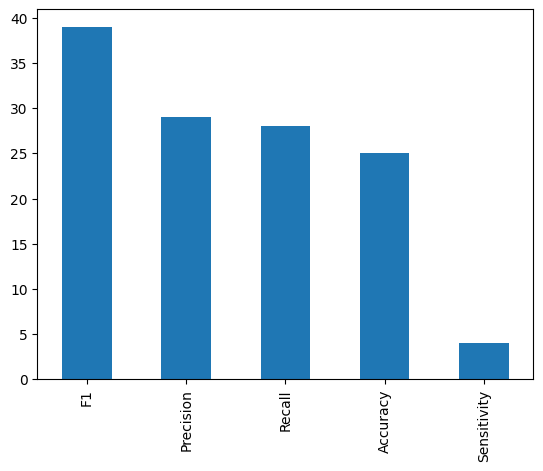

In [30]:
metrics = pd.Series(metrics)
metrics.value_counts()[:5].plot(kind='bar')
plt.savefig('out/metrics-distribution-bar.png', dpi=300, bbox_inches='tight')